In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('winequality-white.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


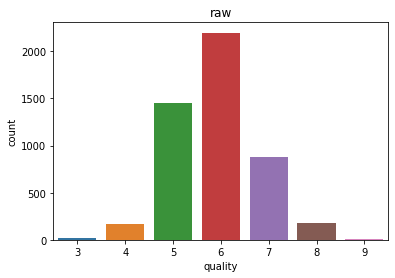

In [3]:
#For this first round, we attempt to do balancing

plt.figure()

sns.countplot('quality', data=df)

plt.title('raw')

plt.show()

In [4]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
#From graph, qualities 3 and 9 are too small. Therefore we do a mapping to convert them for dropping

dict_quality= {
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8
}

df['quality'] = df['quality'].map(dict_quality)

#drop NaN columns
df = df.dropna()

df.quality.value_counts()

6.0    2198
5.0    1457
7.0     880
8.0     175
4.0     163
Name: quality, dtype: int64

In [6]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
q4_df = shuffled_df.loc[shuffled_df['quality'] == 4]

#Randomly select ? observations from the majority classes
q5_df = shuffled_df.loc[shuffled_df['quality'] == 5].sample(n = 163,random_state=42)

q6_df = shuffled_df.loc[shuffled_df['quality'] == 6].sample(n = 163,random_state=42)

q7_df = shuffled_df.loc[shuffled_df['quality'] == 7].sample(n = 163,random_state=42)

q8_df = shuffled_df.loc[shuffled_df['quality'] == 8].sample(n = 163,random_state=42)


# Concatenate both dataframes again
normalized_df = pd.concat([q4_df, q5_df, q6_df, q7_df, q8_df])
normalized_df.head()
normalized_df = normalized_df.reset_index(drop=True)
normalized_df.head()

#plt.figure()

#sns.countplot('quality', data=normalized_df)

#plt.title('balanced')

#plt.show()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.24,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1,4.0
1,6.5,0.29,0.25,2.5,0.142,8.0,111.0,0.99270,3.00,0.44,9.9,4.0
2,7.3,0.49,0.32,5.2,0.043,18.0,104.0,0.99520,3.24,0.45,10.7,4.0
3,7.5,0.26,0.59,11.8,0.046,58.0,164.0,0.99814,3.17,0.46,8.9,4.0
4,9.2,0.28,0.49,11.8,0.042,29.0,137.0,0.99800,3.10,0.34,10.1,4.0


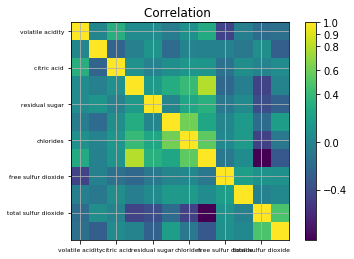

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [8]:
normalized_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.016584,0.329899,0.056514,0.060271,-0.050574,0.089945,0.290890,-0.452254,-0.034397,-0.178733,-0.149701
volatile acidity,0.016584,1.000000,-0.224522,-0.030362,0.120079,-0.187926,-0.008338,-0.017716,-0.020118,-0.091873,0.075972,-0.270637
citric acid,0.329899,-0.224522,1.000000,0.098169,-0.013620,0.085717,0.132832,0.123602,-0.142096,0.080407,-0.007040,0.055588
residual sugar,0.056514,-0.030362,0.098169,1.000000,0.165737,0.307634,0.410608,0.800518,-0.202572,-0.044165,-0.447238,-0.007361
chlorides,0.060271,0.120079,-0.013620,0.165737,1.000000,0.006899,0.249668,0.336599,-0.095332,0.049257,-0.387237,-0.252224
free sulfur dioxide,-0.050574,-0.187926,0.085717,0.307634,0.006899,1.000000,0.609156,0.253535,0.009701,0.159906,-0.174681,0.193370
total sulfur dioxide,0.089945,-0.008338,0.132832,0.410608,0.249668,0.609156,1.000000,0.547447,0.029441,0.157182,-0.467077,-0.091645
density,0.290890,-0.017716,0.123602,0.800518,0.336599,0.253535,0.547447,1.000000,-0.094401,0.065005,-0.821279,-0.320873
pH,-0.452254,-0.020118,-0.142096,-0.202572,-0.095332,0.009701,0.029441,-0.094401,1.000000,0.198060,0.109663,0.093974
sulphates,-0.034397,-0.091873,0.080407,-0.044165,0.049257,0.159906,0.157182,0.065005,0.198060,1.000000,-0.021512,0.028819


In [9]:
#First cut, use those with the highest correlation to select a factor for high accuracy
#All features have been used in this example

#Doing LDA reduction

from sklearn.preprocessing import StandardScaler
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
# Separating out the features
x = normalized_df.loc[:, features].values
# Separating out the target
y = normalized_df.loc[:,['quality']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.158956,-0.432027,-1.242646,-0.951105,0.081984,-1.425708,-1.699700,0.096840,1.157938,-0.201775,-0.473858
1,-0.408246,-0.023793,-0.637396,-0.709844,4.760617,-1.484045,-0.543738,-0.337455,-1.335030,-0.447217,-0.627271
2,0.499277,1.609143,-0.032146,-0.167008,-0.064224,-0.900677,-0.708875,0.497729,0.239476,-0.365403,-0.013616
3,0.726158,-0.268733,2.302391,1.159926,0.081984,1.432795,0.706589,1.479906,-0.219755,-0.283589,-1.394341
4,2.654645,-0.105440,1.437748,1.159926,-0.112959,-0.258972,0.069630,1.433135,-0.678986,-1.265359,-0.473858


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)  
lda_result = lda.fit_transform(x, np.ravel(y))  

ldaDf = pd.DataFrame(data = lda_result
             , columns = ['Linear Discriminant 1', 'Linear Discriminant 2'])

In [13]:
finalLdaDf = pd.concat([ldaDf, df[['quality']]], axis = 1)
finalLdaDf.head(5)

,Linear Discriminant 1,Linear Discriminant 2,quality
0,-1.512006,0.972603,6.0
1,-1.797232,-0.386657,6.0
2,-2.105376,1.589913,6.0
3,-0.600434,-1.248567,6.0
4,-0.331824,0.373062,6.0


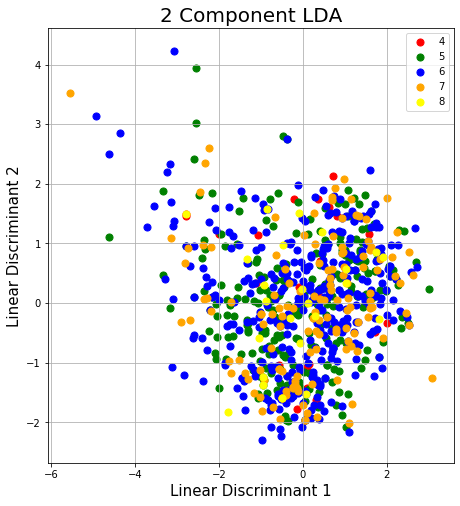

In [15]:
fig = plt.figure(figsize = (16,8))
ax2 = fig.add_subplot(1,2,2) 
ax2.set_xlabel('Linear Discriminant 1', fontsize = 15)
ax2.set_ylabel('Linear Discriminant 2', fontsize = 15)
ax2.set_title('2 Component LDA', fontsize = 20)


targets = [4, 5, 6, 7, 8]
colors = ['red','green','blue','orange','yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalLdaDf['quality'] == target
    ax2.scatter(finalLdaDf.loc[indicesToKeep, 'Linear Discriminant 1']
               , finalLdaDf.loc[indicesToKeep, 'Linear Discriminant 2']
               , c = color
               , s = 50)
ax2.legend(targets)
ax2.grid()


In [16]:
print(lda.explained_variance_ratio_)

print(lda.explained_variance_ratio_.sum())

[0.81049356 0.16819276]
0.9786863193761677
